In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from pcv.process import select_data

In [4]:
t2m_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_t2m.nc"
tp_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_tp.nc"
ssrd_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_ssrd.nc"
lai_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_lai.nc"
swvlall_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_swvlall.nc"
vpd_path = "/data/compoundx/anand/PCV/data/detrended_seasonal_vpd.nc"

t2m_data = xr.open_dataset(t2m_path)
tp_data = xr.open_dataset(tp_path)
ssrd_data = xr.open_dataset(ssrd_path)
swvlall_data = xr.open_dataset(swvlall_path)
vpd_data = xr.open_dataset(vpd_path)
lai_data = xr.open_dataset(lai_path)

t2m_winter = select_data(t2m_data,  "winter")
t2m_spring = select_data(t2m_data,  "spring")
t2m_summer = select_data(t2m_data,  "summer")

tp_winter = select_data(tp_data,  "winter")
tp_spring = select_data(tp_data,  "spring")
tp_summer = select_data(tp_data,  "summer")

ssrd_winter = select_data(ssrd_data,  "winter")
ssrd_spring = select_data(ssrd_data,  "spring")
ssrd_summer = select_data(ssrd_data,  "summer")

lai_winter = select_data(lai_data,  "winter")
lai_spring = select_data(lai_data,  "spring")
lai_summer = select_data(lai_data,  "summer")

swvlall_winter = select_data(swvlall_data,  "winter")
swvlall_spring = select_data(swvlall_data,  "spring")
swvlall_summer = select_data(swvlall_data,  "summer")

vpd_winter = select_data(vpd_data,  "winter")
vpd_spring = select_data(vpd_data,  "spring")
vpd_summer = select_data(vpd_data,  "summer")


AttributeError: 'DataArray' object has no attribute 't2m'

In [19]:
t2m_lai_corr = np.empty((200, 1440))
tp_lai_corr = np.empty((200, 1440))
t2m_w_sp_corr = np.empty((200, 1440))
t2m_sp_su_corr = np.empty((200, 1440))
tp_w_sp_corr = np.empty((200, 1440))
tp_sp_su_corr = np.empty((200, 1440))

t2m_lai_corr[:] = np.nan
tp_lai_corr[:] = np.nan
t2m_w_sp_corr[:] = np.nan
t2m_sp_su_corr[:] = np.nan
tp_w_sp_corr[:] = np.nan
tp_sp_su_corr[:] = np.nan

for lat_i, lat in enumerate(lai_data.lat.values):
    for lon_i , lon in enumerate(lai_data.lon.values):

        lai_w = lai_winter.sel(lon=lon, lat=lat).to_numpy()[1:-1]
        swvlall_w = swvlall_winter.sel(longitude=lon, latitude=lat).to_numpy()[2:-1]
        if np.isnan(lai_w).any() == True:
            pass
        elif np.isnan(swvlall_w).all() == True:
            pass
        else:
           
            
            # FOR LAI
            # taking winter of 1982 and not 1981 which is partial
            # subsequently we leave the last year
            # Account for 1 more year because of the DJA problem 

            lai_su = lai_summer.sel(lon=lon, lat=lat).to_numpy()

            # FOR CLIMATE
            # We have an extra year for climate data, thus need to shift with a +1
            t2m_w = t2m_winter.sel(longitude=lon, latitude=lat).to_numpy()
            t2m_sp = t2m_spring.sel(longitude=lon, latitude=lat).to_numpy()
            t2m_su = t2m_summer.sel(longitude=lon, latitude=lat).to_numpy()
           
            tp_w = tp_winter.sel(longitude=lon, latitude=lat).to_numpy()
            tp_sp = tp_spring.sel(longitude=lon, latitude=lat).to_numpy()
            tp_su = tp_summer.sel(longitude=lon, latitude=lat).to_numpy()

            t2m_lai_corr[lat_i, lon_i]  = np.corrcoef(lai_su, t2m_w)[0,1]
            tp_lai_corr[lat_i, lon_i]  = np.corrcoef(lai_su, tp_w)[0,1]

            t2m_w_sp_corr[lat_i, lon_i] = np.corrcoef(t2m_w, t2m_sp)[0,1]
            t2m_sp_su_corr[lat_i, lon_i] = np.corrcoef(t2m_sp, t2m_su)[0,1]

            tp_w_sp_corr[lat_i, lon_i] = np.corrcoef(tp_w, tp_sp)[0,1]
            tp_sp_su_corr[lat_i, lon_i] = np.corrcoef(tp_sp, tp_su)[0,1]

np.save("lai_su_t2m_w.npy", t2m_lai_corr)
np.save("lai_su_t2p_w.npy", tp_lai_corr)
np.save("t2m_w_sp.npy", t2m_w_sp_corr)
np.save("t2m_sp_su.npy", t2m_sp_su_corr)
np.save("tp_w_sp.npy", tp_w_sp_corr)
np.save("tp_sp_su.npy", tp_sp_su_corr)



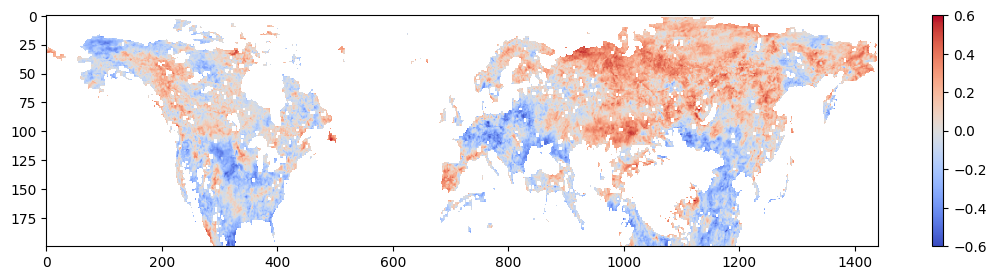

In [22]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(t2m_lai_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("t2m_w_lai_su_corr.png")

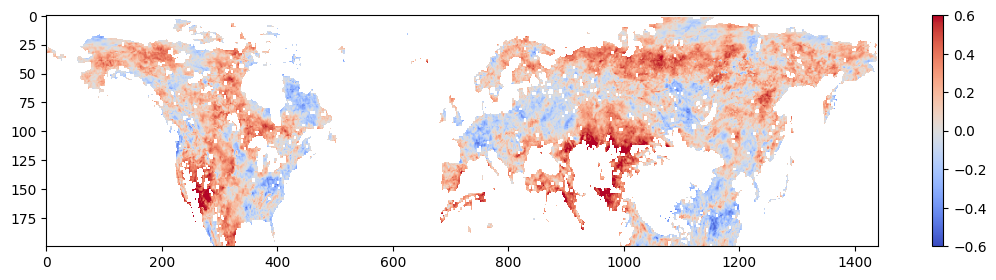

In [23]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(tp_lai_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("tp_w_lai_su_corr.png")a

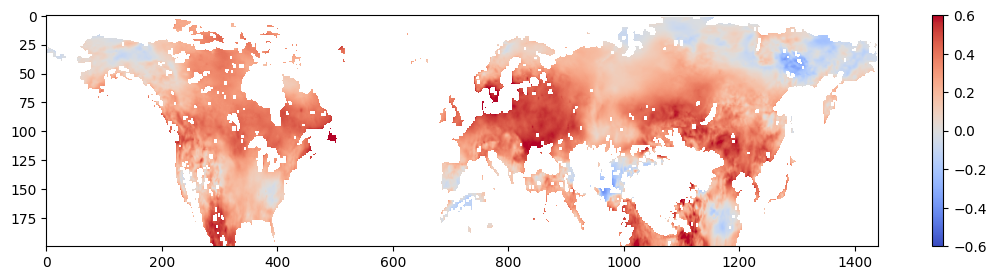

In [24]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(t2m_w_sp_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("t2m_w_sp_corr.png")

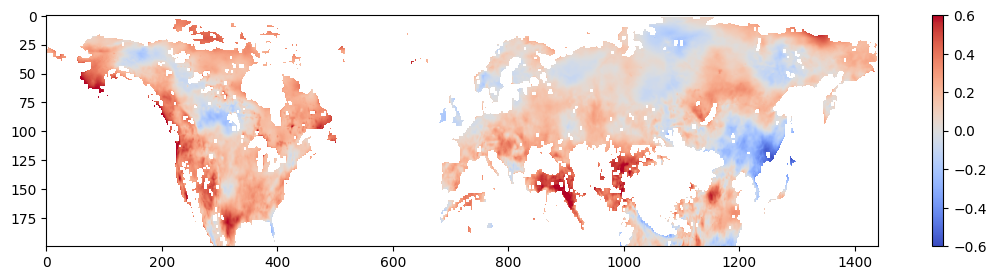

In [25]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(t2m_sp_su_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("t2m_sp_su_corr.png")

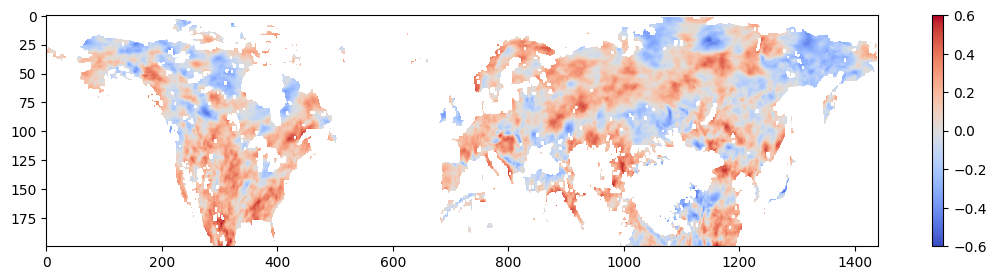

In [26]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(tp_w_sp_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("tp_w_sp_corr.png")

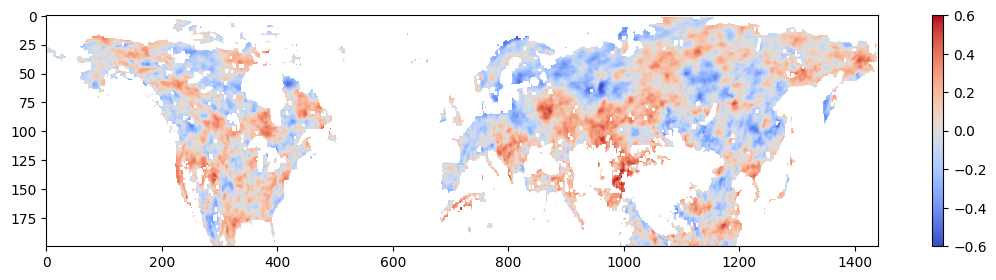

In [27]:
fig, ax =plt.subplots(figsize=(14,3))

plt.imshow(np.flip(tp_sp_su_corr, axis=0), cmap = "coolwarm", aspect = 2, vmin = -0.6, vmax =0.6)
plt.colorbar()
plt.savefig("tp_sp_su_corr.png")